# Komi David ABOTSITSE



# 1. LDA (Analyse Discriminante Linéaire) : Une méthode qui réduit la dimension des données tout en maximisant la séparation entre les classes.
# LDA est particulièrement utile lorsque nous avons des étiquettes de classes et que nous souhaitons réduire la dimensionnalité tout en préservant l'information discriminative.
# 2. T-SNE (t-distributed Stochastic Neighbor Embedding) : Méthode non-linéaire qui est utilisée pour la visualisation de données de haute dimension dans un espace de faible dimension
# Il est particulièrement utile pour découvrir des structures complexes de données.
# 3. UMAP (Uniform Manifold Approximation and Projection) : Une autre technique non-linéaire utilisée pour la réduction de dimensionnalité, offrant souvent de meilleurs résultats que T-SNE en termes de préservation des structures globales.


In [1]:
! pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.5 MB/s eta 0:00:00


# Librairies nécessaires

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from itertools import combinations
import umap
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

Pour ignorer les warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Jeux de données

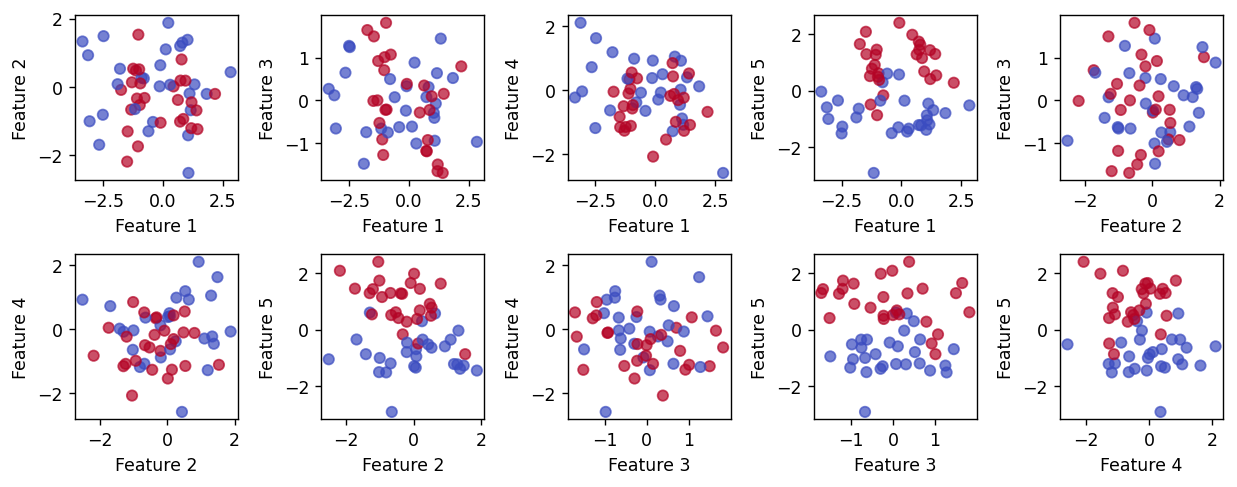

In [4]:
# Définition des paramètres pour la génération des données

n_features = 5      # Nombre total de caractéristiques (features)
n_samples = 55      # Nombre total d'observations
random_state = 58   # Définition de la graine aléatoire pour la reproductibilité

# Génération d'un jeu de données de classification binaire
X, y = make_classification(
    n_samples=n_samples,    # Nombre d'échantillons
    n_features=n_features,  # Nombre total de caractéristiques
    n_informative=2,        # Nombre de caractéristiques réellement informatives
    n_classes=2,            # Nombre de classes dans le jeu de données (binaire)
    random_state=random_state, # Fixation du hasard pour reproductibilité
    n_redundant=0,          # Nombre de caractéristiques redondantes (corrélées aux informatives)
    n_repeated=0            # Nombre de caractéristiques répétées
)

# Création d'une figure pour la visualisation des données
fig = plt.figure(dpi=125, figsize=(10,4))

# Boucle pour créer des graphiques en nuages de points pour chaque paire de caractéristiques
for i, v in enumerate(combinations(np.arange(n_features), 2)):
    ax = fig.add_subplot(2, n_features, i+1)  # Création de sous-graphiques
    a, b = v  # Extraction des indices des deux caractéristiques à afficher
    ax.scatter(X[:, a], X[:, b], c=y, cmap='coolwarm', alpha=0.7)  # Tracé des points colorés par classe
    ax.set_xlabel('Feature ' + str(a+1))  # Étiquette pour l'axe des abscisses
    ax.set_ylabel('Feature ' + str(b+1))  # Étiquette pour l'axe des ordonnées

# Ajustement des espaces entre les sous-graphiques
plt.tight_layout()

# Affichage du graphique
plt.show()

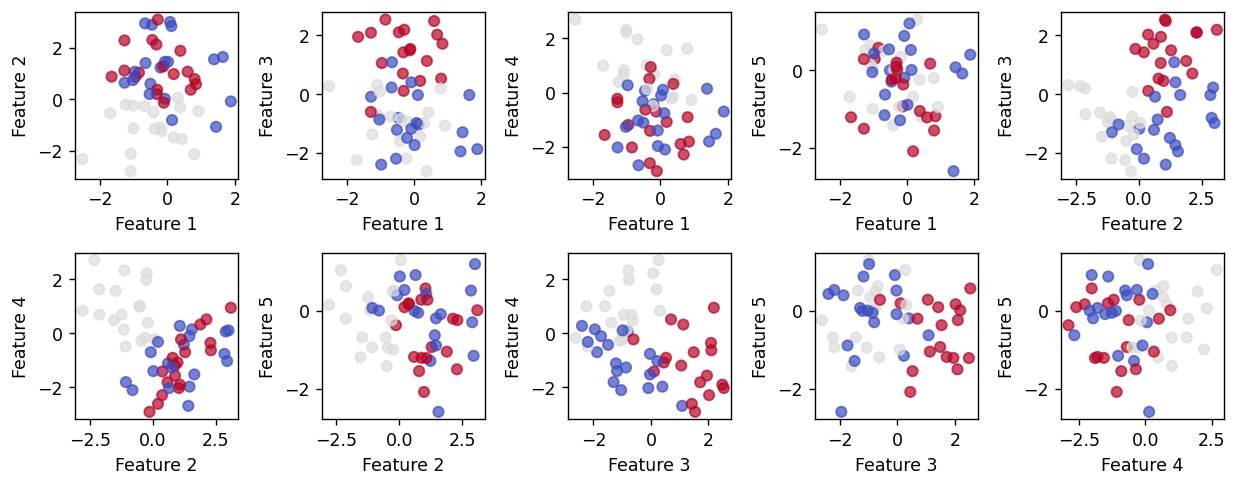

In [5]:
#Génération d'un jeu de données synthétique avec plusieurs classes
X1, y1 = make_classification(
    n_samples=n_samples,       # Nombre total d'échantillons
    n_features=n_features,     # Nombre total de caractéristiques (features)
    n_informative=3,           # Nombre de features réellement informatives
    n_classes=3,               # Nombre de classes à prédire
    random_state=random_state, # Assure la reproductibilité des résultats
    n_redundant=0,             # Nombre de features redondantes (combinées linéairement avec les informatives)
    n_repeated=0,              # Nombre de features dupliquées
    n_clusters_per_class=1     # Nombre de clusters par classe
)

# Création d'une figure pour afficher plusieurs sous-graphiques
fig = plt.figure(dpi=125, figsize=(10, 4))

# Boucle sur toutes les combinaisons possibles de 2 features parmi les n_features
for i, v in enumerate(combinations(np.arange(n_features), 2)):
    ax = fig.add_subplot(2, n_features, i + 1)  # Ajout d'un sous-graphique à la figure
    a, b = v  # Indices des deux features sélectionnées

    # Tracé d'un scatter plot pour visualiser la relation entre ces deux features
    ax.scatter(
        X1[:, a], X1[:, b],  # Coordonnées des points (feature a en X, feature b en Y)
        c=y1,                # Couleurs selon les classes
        cmap='coolwarm',      # Palette de couleurs
        alpha=0.7             # Transparence pour éviter le chevauchement des points
    )

    # Étiquetage des axes avec les numéros des features
    ax.set_xlabel('Feature ' + str(a + 1))
    ax.set_ylabel('Feature ' + str(b + 1))

# Ajustement automatique des marges pour une meilleure lisibilité
plt.tight_layout()

# Affichage du graphique
plt.show()

# 1. LDA
Projection des données dans un espace latent. Cet espace dépend du nombre de classes.
Il est important de noter que la projection ne peut que se faire sur au plus nombre de classes - 1 dimensions latentes.

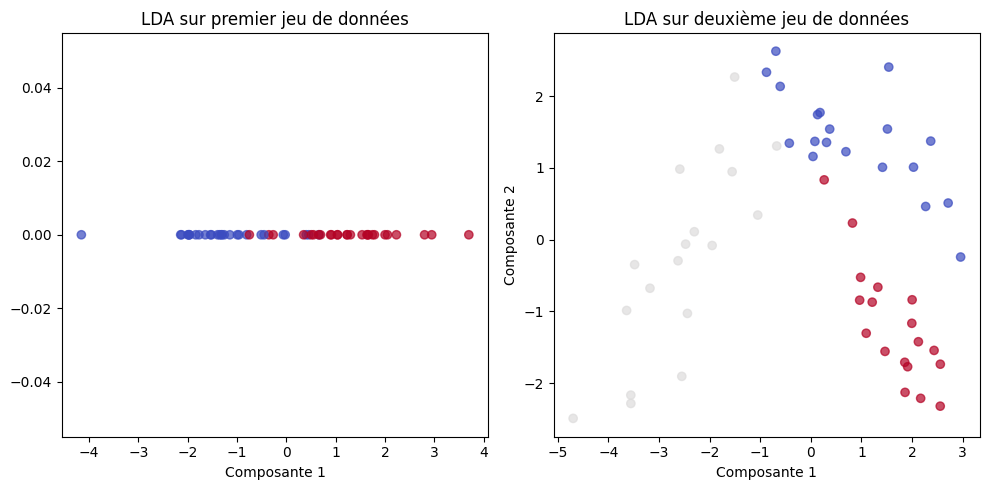

In [6]:
# Application de l'Analyse Discriminante Linéaire (LDA) avec 1 seule composante
lda = LinearDiscriminantAnalysis(n_components=1)  # Réduction à 1 dimension
X_lda = lda.fit_transform(X, y)  # Transformation des données du premier jeu de données

# Application de l'Analyse Discriminante Linéaire (LDA) avec 2 composantes
lda2 = LinearDiscriminantAnalysis(n_components=2)  # Réduction à 2 dimensions
X_lda2 = lda2.fit_transform(X1, y1)  # Transformation des données du deuxième jeu de données

# Création d'une figure avec deux sous-graphiques côte à côte
fig = plt.figure(dpi=100, figsize=(10,5))
ax1, ax2 = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)  # Deux axes pour les deux jeux de données

# Tracé du premier jeu de données projeté sur une seule dimension
ax1.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='coolwarm', alpha=0.7)  # Affichage sur un axe horizontal
ax1.set_xlabel('Composante 1')  # Nom de l'axe X
ax1.set_title('LDA sur premier jeu de données')  # Titre du graphique

# Tracé du deuxième jeu de données projeté sur deux dimensions
ax2.scatter(X_lda2[:,0], X_lda2[:,1], c=y1, cmap='coolwarm', alpha=0.7)  # Affichage sur un plan 2D
ax2.set_xlabel('Composante 1')  # Nom de l'axe X
ax2.set_ylabel('Composante 2')  # Nom de l'axe Y
ax2.set_title('LDA sur deuxième jeu de données')  # Titre du graphique

# Ajustement des espacements pour éviter que les titres/étiquettes se chevauchent
plt.tight_layout()

# Affichage des graphiques
plt.show()

# 2. T-SNE (t-distributed Stochastic Neighbor Embedding)

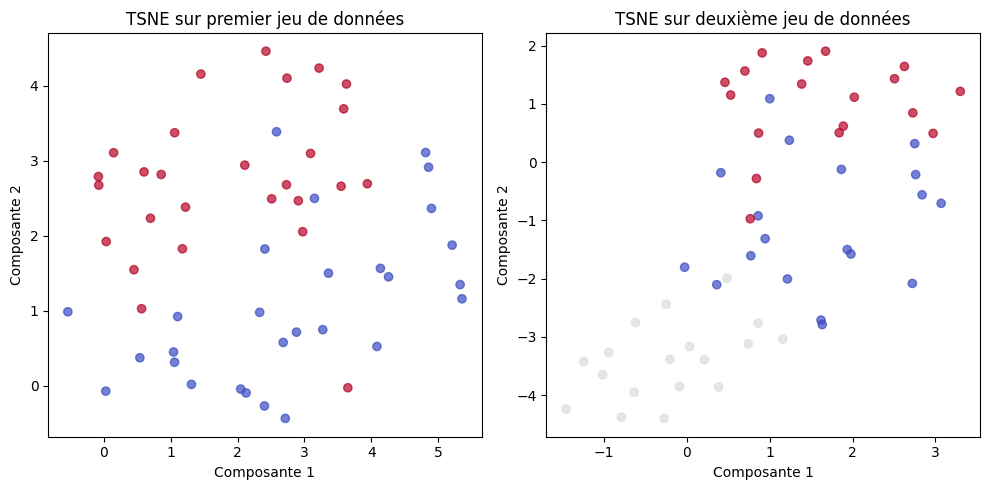

In [7]:
# Initialisation de l'algorithme t-SNE pour la réduction de dimension à 2 composantes
tsne = TSNE(n_components=2, random_state=random_state)  # Projection dans un espace 2D

# Application de t-SNE sur le premier jeu de données
X_tsne = tsne.fit_transform(X)  # Transformation des données d'origine vers un espace réduit

# Application de t-SNE sur le deuxième jeu de données
X_tsne2 = tsne.fit_transform(X1)  # Transformation des données du second jeu

# Création d'une figure avec deux sous-graphiques pour comparer les résultats
fig = plt.figure(dpi=100, figsize=(10,5))
ax1, ax2 = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)  # Deux sous-graphiques côte à côte

# Tracé des points du premier jeu de données transformé par t-SNE
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='coolwarm', alpha=0.7)  # Affichage en 2D avec couleurs selon les classes
ax1.set_xlabel('Composante 1')  # Étiquette de l'axe X
ax1.set_ylabel('Composante 2')  # Étiquette de l'axe Y
ax1.set_title('TSNE sur premier jeu de données')  # Titre du premier graphique

# Tracé des points du deuxième jeu de données transformé par t-SNE
ax2.scatter(X_tsne2[:,0], X_tsne2[:,1], c=y1, cmap='coolwarm', alpha=0.7)  # Même affichage pour le second jeu de données
ax2.set_xlabel('Composante 1')  # Étiquette de l'axe X
ax2.set_ylabel('Composante 2')  # Étiquette de l'axe Y
ax2.set_title('TSNE sur deuxième jeu de données')  # Titre du second graphique

# Ajustement de l'affichage pour éviter que les éléments se chevauchent
plt.tight_layout()

# Affichage du graphique
plt.show()

# 3. UMAP (Uniform Manifold Approximation and Projection)

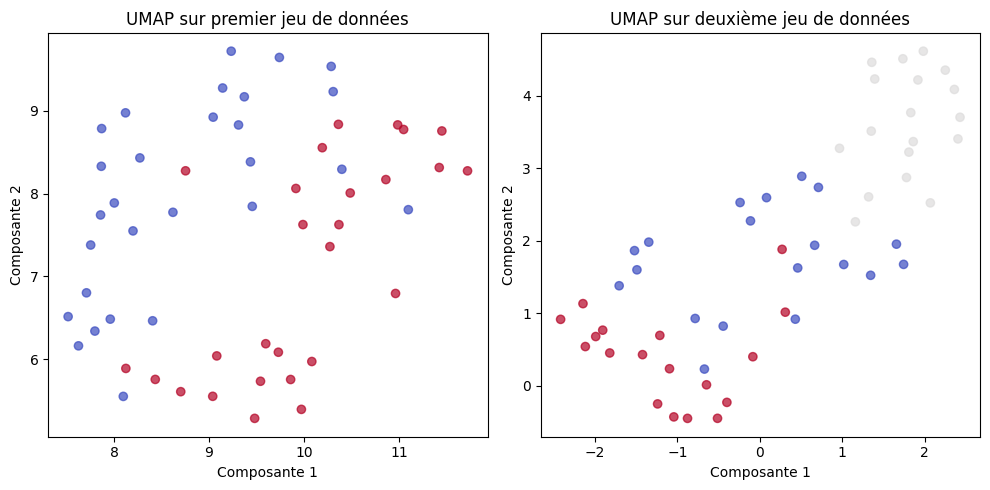

In [8]:
# Initialisation du modèle UMAP pour réduire la dimension à 2 composantes
umap_model = umap.UMAP(n_components=2, random_state=42)  # Projection en 2D avec une graine aléatoire fixe

# Application d'UMAP sur le premier jeu de données
X_umap = umap_model.fit_transform(X)  # Transformation des données d'origine en espace réduit

# Application d'UMAP sur le deuxième jeu de données
X_umap2 = umap_model.fit_transform(X1)  # Transformation du second jeu de données

# Création d'une figure avec deux sous-graphiques pour comparer les résultats
fig = plt.figure(dpi=100, figsize=(10,5))
ax1, ax2 = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)  # Deux sous-graphiques côte à côte

# Tracé des points du premier jeu de données transformé par UMAP
ax1.scatter(X_umap[:,0], X_umap[:,1], c=y, cmap='coolwarm', alpha=0.7)  # Affichage des points colorés selon les classes
ax1.set_xlabel('Composante 1')  # Étiquette de l'axe X
ax1.set_ylabel('Composante 2')  # Étiquette de l'axe Y
ax1.set_title('UMAP sur premier jeu de données')  # Titre du premier graphique

# Tracé des points du deuxième jeu de données transformé par UMAP
ax2.scatter(X_umap2[:,0], X_umap2[:,1], c=y1, cmap='coolwarm', alpha=0.7)  # Affichage des points colorés selon les classes
ax2.set_xlabel('Composante 1')  # Étiquette de l'axe X
ax2.set_ylabel('Composante 2')  # Étiquette de l'axe Y
ax2.set_title('UMAP sur deuxième jeu de données')  # Titre du second graphique

# Ajustement de l'affichage pour éviter que les éléments se chevauchent
plt.tight_layout()

# Affichage des graphiques
plt.show()

**Tâche à réaliser : Extraction des Caractéristiques**

**Contexte :** Dans cette tâche, vous utiliserez un jeu de données appelé gene_expression_cancer (disponible sur moodle). L'objectif de cette activité est d'appliquer des méthodes d'extraction de caractéristiques via ADL, TSNE et UMAP.

Vous devez vous assurez que les différentes classes soient coloriées dans vos nuages points comme les exemples présentés lors de l'atelier.

## <div class="alert alert-block alert-info">Vous devez retourner ce notebook avec les commentaires sur l'ensemble du code y compris la partie faite durant la séance de l'atelier !</div>

Pandas voir un extrait de notre dataset

In [9]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [10]:
labels = pd.read_csv('labels.csv')
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


Quelques statistiques interessantes sur notre jeu de données

In [11]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [12]:
labels.describe()

,Unnamed: 0,Class
count,801,801
unique,801,5
top,sample_0,BRCA
freq,1,300


Vérification des données manquantes

In [13]:
data.isnull().sum()

,0
Unnamed: 0,0
gene_0,0
gene_1,0
gene_2,0
gene_3,0
...,...
gene_20526,0
gene_20527,0
gene_20528,0
gene_20529,0


In [14]:
labels.isnull().sum()

,0
Unnamed: 0,0
Class,0


On remarque d'après le plot qu'on a cinq classes distinctes
BRCA, KIRC, LUAD, PRAD, COAD avec la classe BRCA qui est la classe avec le plus de nombre d'occurences

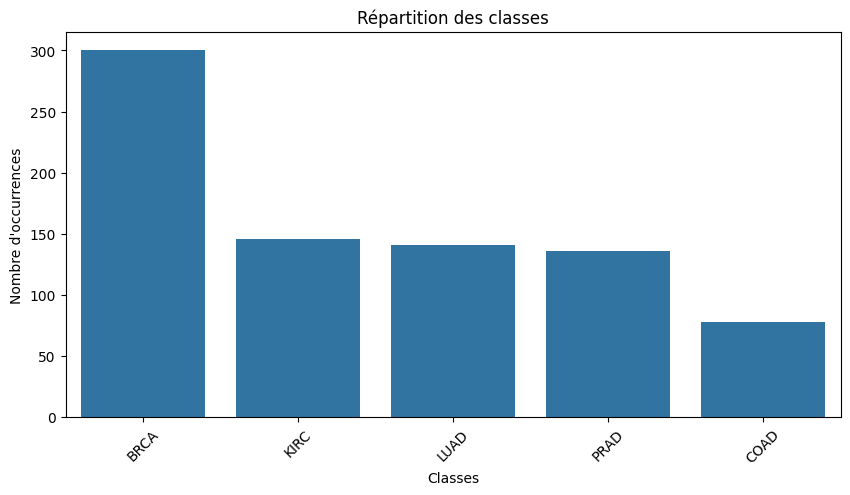

In [15]:

plt.figure(figsize=(10, 5))
sns.barplot(x=labels['Class'].value_counts().index, y=labels['Class'].value_counts().values)

plt.xlabel("Classes")
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des classes")
plt.xticks(rotation=45)  # Rotation des étiquettes si nécessaire
plt.show()

Drop des columns Unnamed: 0 dans nos deux dataframes data et labels

In [16]:
X = data.drop(columns='Unnamed: 0')
y = labels.drop(columns='Unnamed: 0')

X.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [17]:
y.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


# LDA

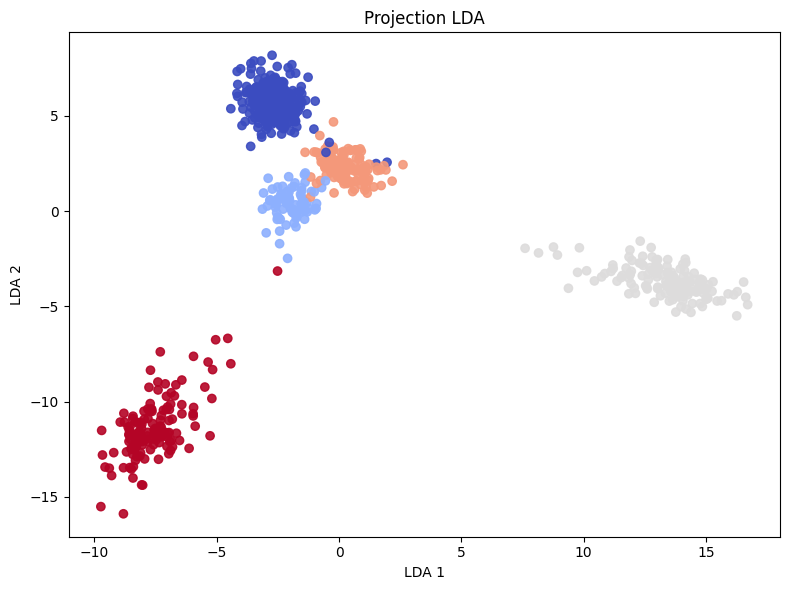

In [18]:
# Initialisation du modèle LDA avec 2 composantes
lda = LinearDiscriminantAnalysis(n_components=2)

# Application de LDA sur les données X avec les labels y
X_lda = lda.fit_transform(X, y)

# Création d'une figure et d'un axe pour le graphique
fig, axes = plt.subplots(figsize=(8, 6), dpi=100)

# Encodage des labels en valeurs numériques (nécessaire pour l'affichage des couleurs)
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# Création du nuage de points avec les 2 premières composantes LDA
scatter = axes.scatter(
    X_lda[:, 0], X_lda[:, 1],  # Coordonnées des points dans l'espace réduit
    c=y_numeric,               # Couleurs selon les classes
    cmap='coolwarm',           # Palette de couleurs
    alpha=0.9                  # Légère transparence pour éviter le chevauchement
)

# Ajout des labels et titre du graphique
axes.set_xlabel('LDA 1')  # Nom de l'axe X
axes.set_ylabel('LDA 2')  # Nom de l'axe Y
axes.set_title('Projection LDA')  # Titre du graphique

# Ajustement automatique des marges pour une meilleure lisibilité
plt.tight_layout()

# Affichage du graphique
plt.show()

# TSNE

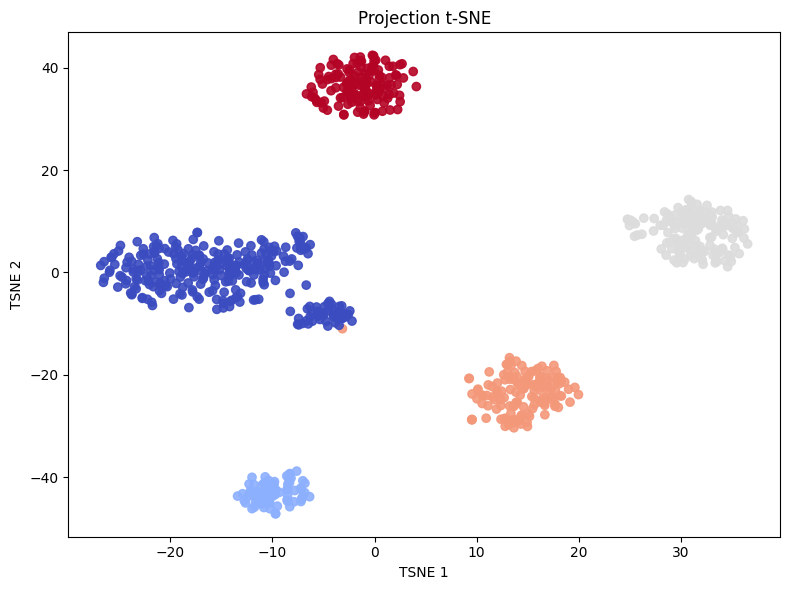

In [19]:

# Initialisation du modèle t-SNE avec 2 composantes
tsne = TSNE(n_components=2, random_state=random_state)

# Application de t-SNE sur les données X (réduction à 2 dimensions)
X_tsne = tsne.fit_transform(X)

# Création d'une figure et d'un axe pour le graphique
fig, axes = plt.subplots(figsize=(8, 6), dpi=100)

# Encodage des labels en valeurs numériques (pour l'affichage des couleurs)
le = LabelEncoder()
y_numeric_tsne = le.fit_transform(y)

# Création du nuage de points avec les 2 premières dimensions t-SNE
axes.scatter(
    x=X_tsne[:, 0], y=X_tsne[:, 1],  # Coordonnées des points dans l'espace réduit
    c=y_numeric_tsne,                # Couleurs selon les classes
    cmap='coolwarm',                  # Palette de couleurs
    alpha=0.9                         # Légère transparence pour éviter le chevauchement
)

# Ajout des labels et titre du graphique
axes.set_xlabel('TSNE 1')  # Nom de l'axe X
axes.set_ylabel('TSNE 2')  # Nom de l'axe Y
axes.set_title('Projection t-SNE')  # Titre du graphique

# Ajustement automatique des marges pour une meilleure lisibilité
plt.tight_layout()

# Affichage du graphique
plt.show()

# UMAP

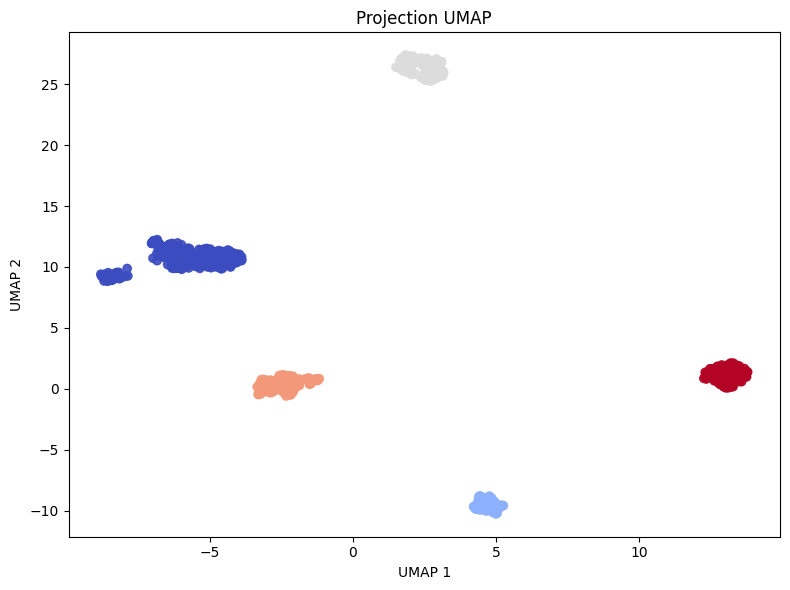

In [20]:
# Initialisation du modèle UMAP avec 2 composantes principales
umap_model = umap.UMAP(n_components=2, random_state=42)

# Application de UMAP sur les données X pour les réduire à 2 dimensions
X_umap = umap_model.fit_transform(X)

# Création d'une figure et d'un axe pour le graphique
fig, axes = plt.subplots(figsize=(8, 6), dpi=100)

# Encodage des labels en valeurs numériques (pour la coloration des points)
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# Création du nuage de points avec les 2 premières dimensions UMAP
axes.scatter(
    x=X_umap[:, 0], y=X_umap[:, 1],  # Coordonnées des points après réduction
    c=y_numeric,                     # Couleurs selon les classes
    cmap='coolwarm',                  # Palette de couleurs
    alpha=0.9                         # Légère transparence pour éviter le chevauchement
)

# Ajout des labels et titre du graphique
axes.set_xlabel('UMAP 1')  # Nom de l'axe X
axes.set_ylabel('UMAP 2')  # Nom de l'axe Y
axes.set_title('Projection UMAP')  # Titre du graphique

# Ajustement automatique des marges pour une meilleure lisibilité
plt.tight_layout()

# Affichage du graphique
plt.show()